# eda

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_rows = 35
pd.options.display.max_columns = 35

df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [8]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

### fraud ratio

In [9]:
df['FraudFound'].value_counts()

No     14497
Yes      923
Name: FraudFound, dtype: int64

In [10]:
ratio_of_fraud_vs_nonfraud = len(df[df['FraudFound'] == 'Yes']) / len(df[df['FraudFound'] == 'No'])
ratio_of_fraud_vs_nonfraud

0.06366834517486376

The ratio of fraud vs non-fraud transactions is 0.06366834517486376.

### check duplicate rows

In [11]:
unique_dataset = df.drop_duplicates()
duplicates = len(df) - len(unique_dataset)
duplicates

0

### check for nulls

In [12]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

### some plots to show distribution

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PolicyNumber'}>],
       [<Axes: title={'center': 'RepNumber'}>,
        <Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

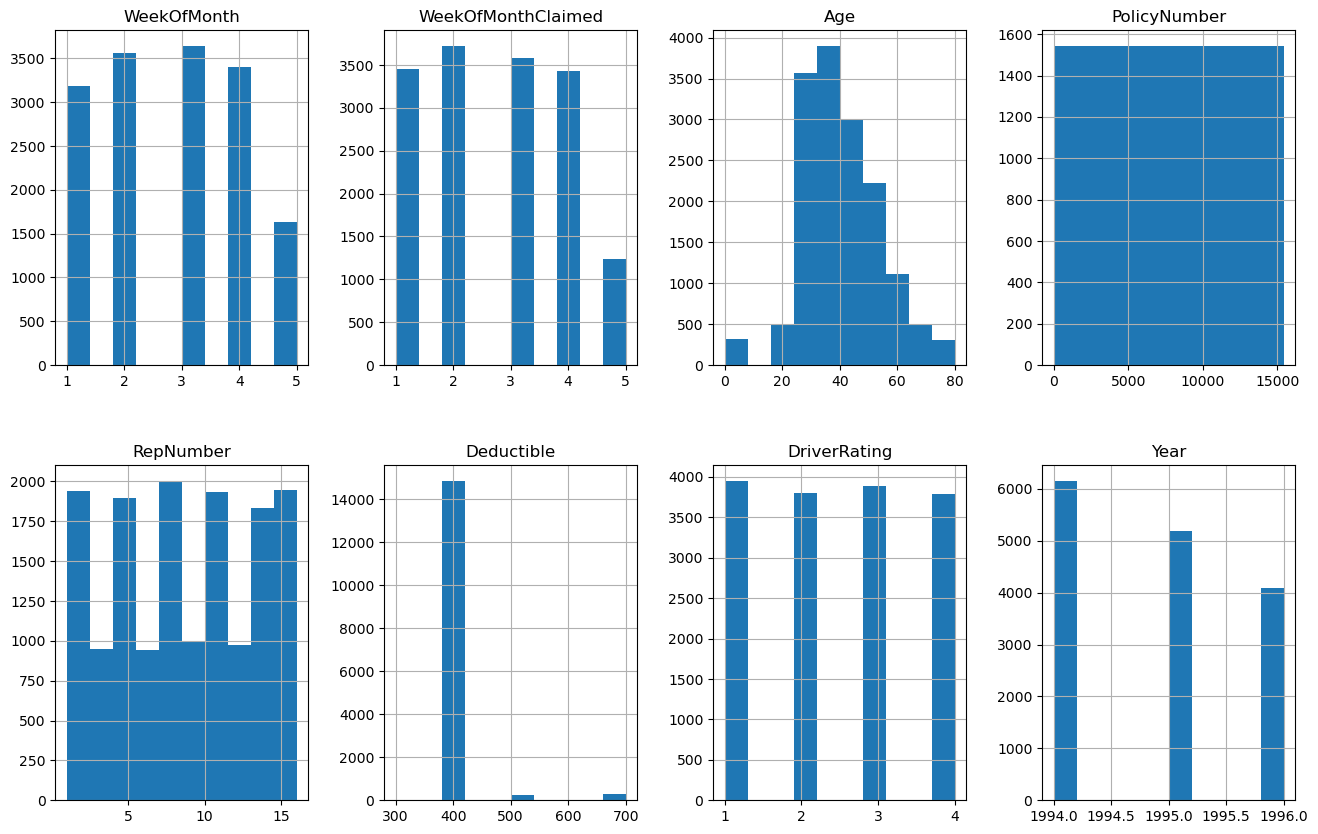

In [87]:
fig, axis = plt.subplots(2, 4, figsize=(16, 10))
df.hist(ax = axis)

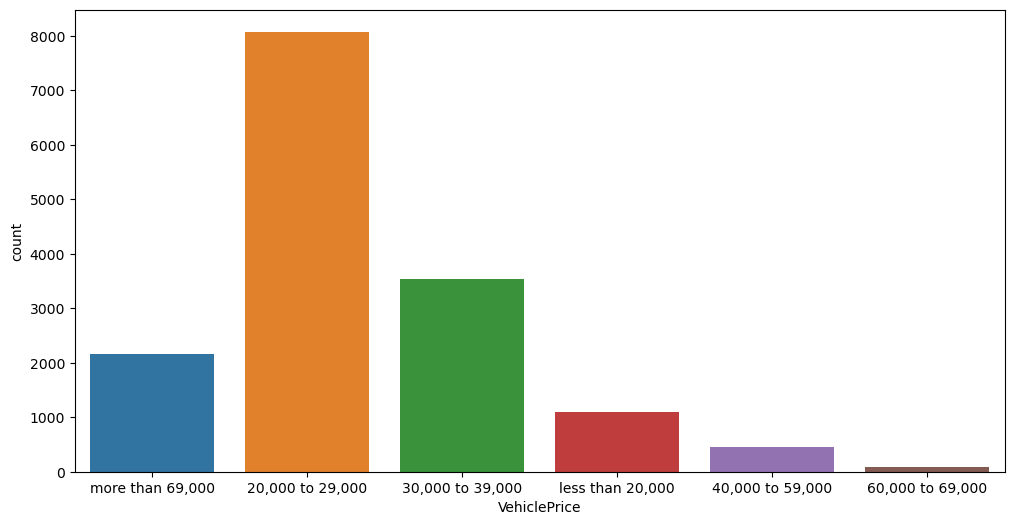

In [88]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'VehiclePrice')
plt.show()

<Axes: title={'center': 'Distribution of fraud'}>

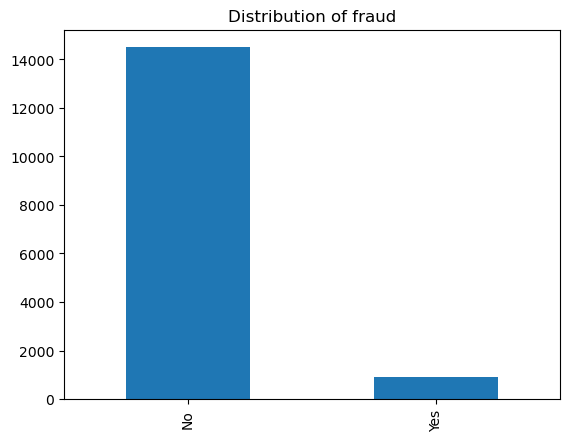

In [89]:
df['FraudFound'].value_counts().plot(kind='bar', title='Distribution of fraud')

In [90]:
df = df.replace('No', 0)
df = df.replace('Yes', 1)

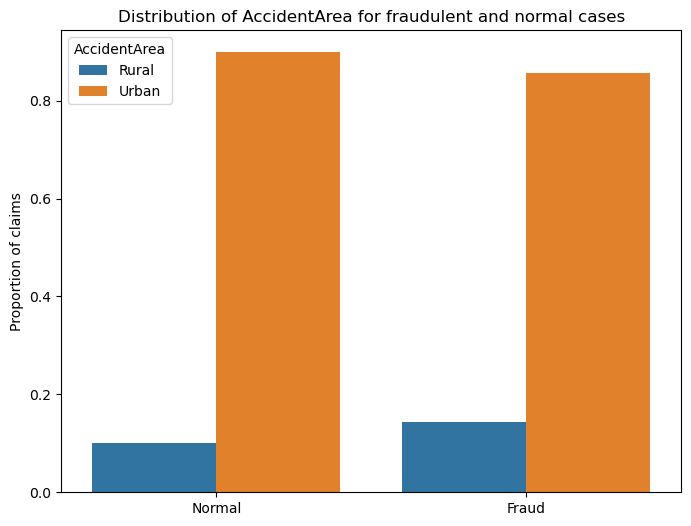

In [91]:
plt.figure(figsize = (8, 6))
accident_area_by_fraud = df.groupby(['FraudFound', 'AccidentArea']).size().groupby(level = 0, group_keys = False).apply(lambda x: x / x.sum()).reset_index(name = 'Proportion')
sns.barplot(data = accident_area_by_fraud, x = 'FraudFound', y = 'Proportion', hue = 'AccidentArea')

plt.title('Distribution of AccidentArea for fraudulent and normal cases')
plt.xlabel('')
plt.xticks(ticks = [0, 1], labels = ['Normal', 'Fraud'])
plt.ylabel('Proportion of claims')

plt.show()

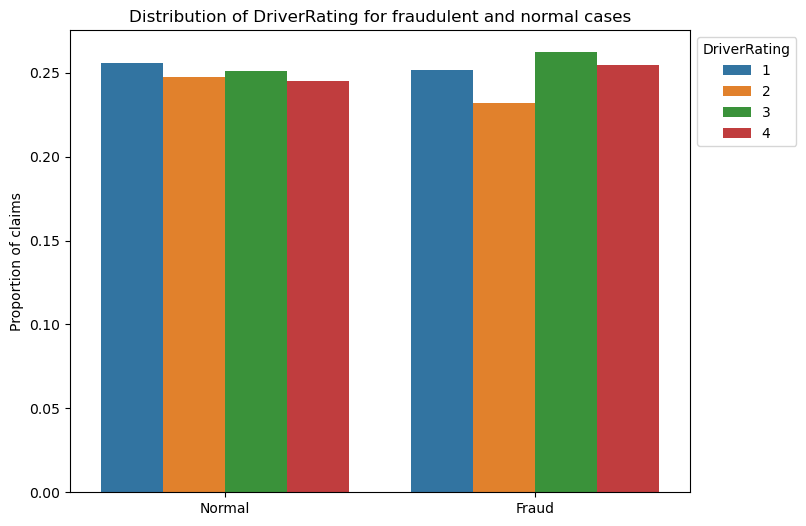

In [92]:
plt.figure(figsize = (8, 6))
driver_rating_by_fraud = df.groupby(['FraudFound', 'DriverRating']).size().groupby(level=0, group_keys=False).apply(lambda x: x / x.sum()).reset_index(name='Proportion')
sns.barplot(data=driver_rating_by_fraud, x = 'FraudFound', y = 'Proportion', hue = 'DriverRating')

plt.title('Distribution of DriverRating for fraudulent and normal cases')
plt.xlabel('')
plt.xticks(ticks = [0, 1], labels = ['Normal', 'Fraud'])
plt.ylabel('Proportion of claims')
plt.legend(title = 'DriverRating', bbox_to_anchor = (1, 1))

plt.show()

<Axes: xlabel='Age'>

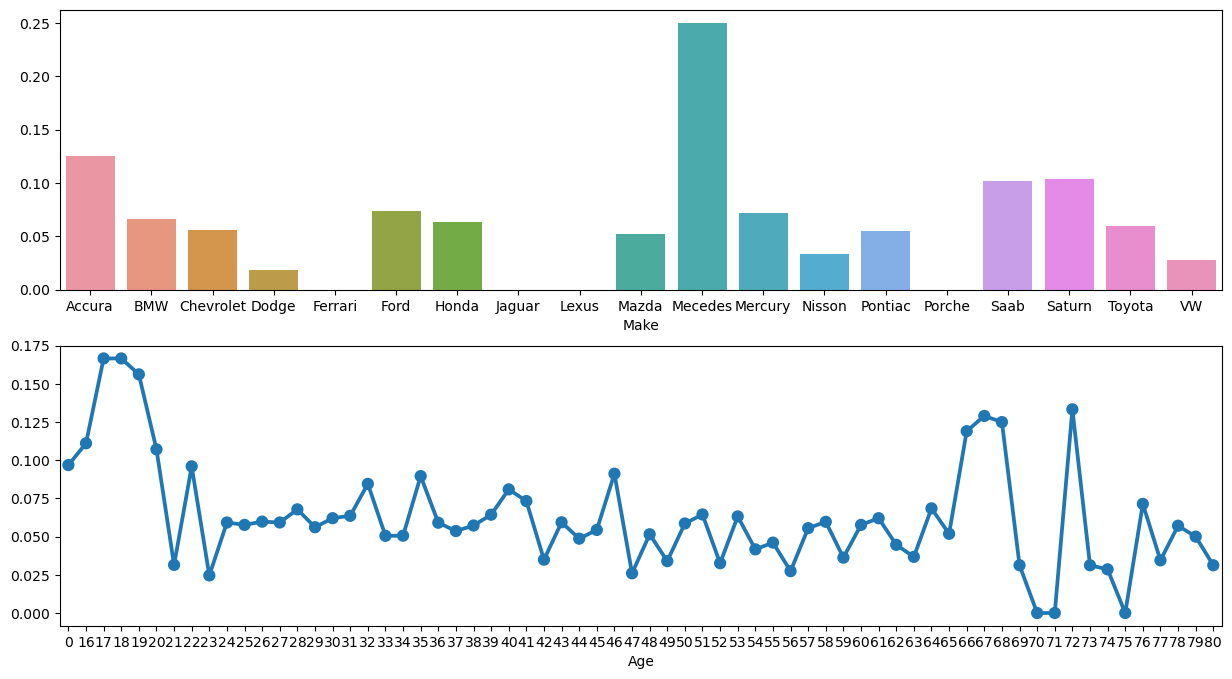

In [93]:
make_fraud = df.groupby('Make')['FraudFound'].mean()
age_fraud = df.groupby('Age')['FraudFound'].mean()
fig, ax = plt.subplots(2, 1, figsize=(15,8))
sns.barplot(x=make_fraud.index, y=make_fraud.values, ax=ax[0])
sns.pointplot(x=age_fraud.index, y=age_fraud.values, ax=ax[1])

### idt age supposed to have 0, 0 means the driver is 16-17 i think?

In [94]:
df[df["Age"] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,"more than 69,000",8,1,400,4,more than 30,more than 30,1,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Collision,0
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,"more than 69,000",14,12,400,3,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Collision,0
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",29,9,400,1,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,All Perils,1
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,"more than 69,000",32,6,400,1,more than 30,more than 30,1,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Collision,0
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",59,15,400,4,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1994,Liability,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",15244,7,400,3,more than 30,more than 30,none,new,16 to 17,0,0,External,none,no change,1 vehicle,1996,Liability,0
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",15263,5,400,3,more than 30,more than 30,more than 4,new,16 to 17,0,0,External,none,no change,1 vehicle,1996,Liability,0
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,"more than 69,000",15275,1,400,2,more than 30,more than 30,more than 4,new,16 to 17,0,0,External,none,no change,1 vehicle,1996,Collision,0
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,0,Policy Holder,Utility - All Perils,Utility,"more than 69,000",15380,1,400,3,more than 30,more than 30,more than 4,new,16 to 17,0,0,External,none,1 year,1 vehicle,1996,All Perils,0


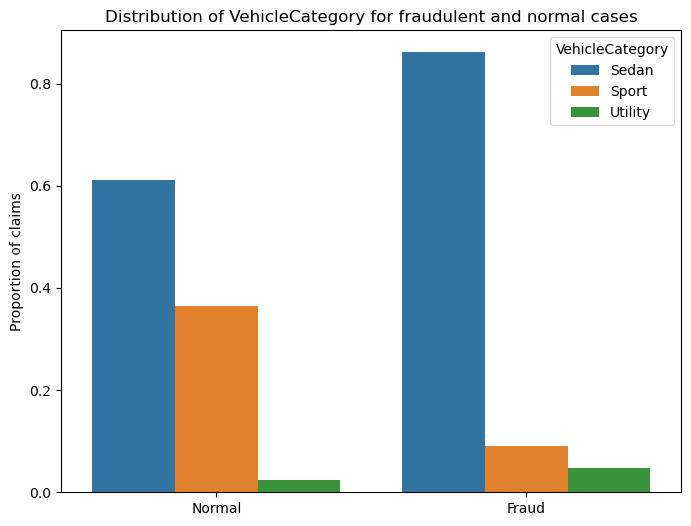

In [95]:
plt.figure(figsize = (8, 6))
vehicle_category_by_fraud = df.groupby(['FraudFound', 'VehicleCategory']).size().groupby(level=0, group_keys=False).apply(lambda x: x / x.sum()).reset_index(name='Proportion')
sns.barplot(data = vehicle_category_by_fraud, x = 'FraudFound', y = 'Proportion', hue = 'VehicleCategory')

plt.title('Distribution of VehicleCategory for fraudulent and normal cases')
plt.xlabel('')
plt.xticks(ticks = [0, 1], labels = ['Normal', 'Fraud'])
plt.ylabel('Proportion of claims')

plt.show()

While sedans are the majority category in both normal and fraudulent claims, the disparity between sedans and other vehicle categories is larger among the latter group. 

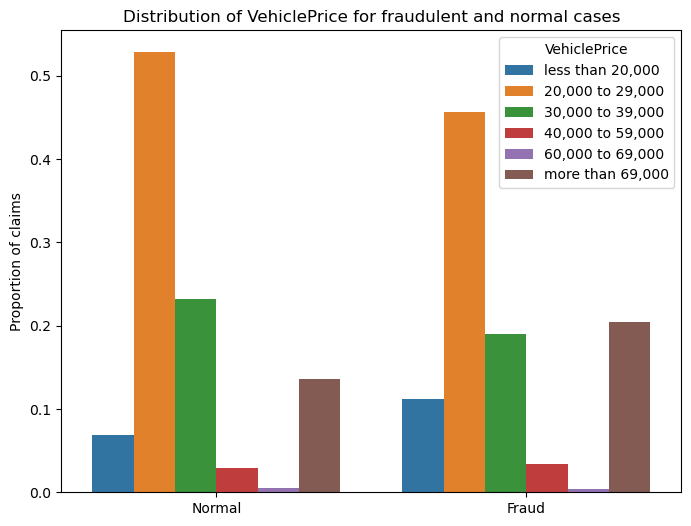

In [96]:
plt.figure(figsize = (8, 6))
vehicle_price_by_fraud = df.groupby(['FraudFound', 'VehiclePrice']).size().groupby(level=0, group_keys=False).apply(lambda x: x / x.sum()).reset_index(name='Proportion')
price_order = ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000']
sns.barplot(data = vehicle_price_by_fraud, x = 'FraudFound', y = 'Proportion', hue = 'VehiclePrice', hue_order = price_order)

plt.title('Distribution of VehiclePrice for fraudulent and normal cases')
plt.xlabel('')
plt.xticks(ticks = [0, 1], labels = ['Normal', 'Fraud'])
plt.ylabel('Proportion of claims')

plt.show()

Majority of vehicles cost between 20,000 - 29,000. According to the distributions, there is no immediate observable relationship between vehicle price and fraud. There is some difference in the distributions, however more precise testing must be done to determine if vehicle price influences whether the claim is fraudulent or not.